<a href="https://colab.research.google.com/github/Kutmi/PPPO-Projekat/blob/main/DetekcijaSGE_IT37G2020_Milan_Radisevic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tema projekta - Detekcija godina, pola i emocija


---



**Nastavnik**

dr Marko Arsenović

**Asistent**

Žuvela Tamara

**Student**

Milan Radišević IT-37/2020

# Teorijski deo


---




Mašinsko učenje je grana veštačke inteligencije koja se bavi proučavanjem algoritama i modela koji omogućavaju računarima da autonomno uče iz podataka i poboljšavaju svoje performanse tokom vremena. Umesto da budu programirani za obavljanje određenih zadataka, sistemi zasnovani na mašinskom učenju koriste podatke kako bi identifikovali obrasce, donosili odluke i rešavali probleme.



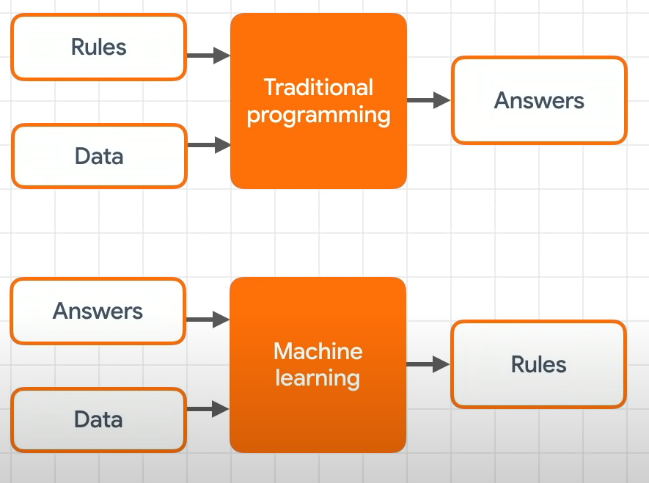

U osnovi mašinskog učenja su modeli, koji su matematički algoritmi koji koriste podatke za prilagođavanje svojih parametara i sticanje sposobnosti donošenja predviđanja ili donošenja odluka bez eksplicitnog programiranja. Ove sposobnosti omogućavaju primenu mašinskog učenja u mnogim oblastima.

Neuronske mreže se sastoje od slojeva koji sadrže neurone i slojevi komuniciraju međusobno.
Prosleđivanjem podataka neuronskoj mreži, na osnovu parametara optimizatora i računanja gubitka, neuroni nalaze pravila za prosleđene podatke, dakle tokom vremena, neuronska mreža postaje "tačnija" u predviđanju, što ne znači da je pronašla odgovor na zadati problem, ali je pomoću matematičkih formula i pravila odredila da je to rešenje sa najvećom verovatnoćom (na osnovu podataka nad kojim je trenirana).




Multi-Layer_Neural_Network-Vector.svg


Detekcija godina i pola osobe kao i emocije lica predstavljaju ključne zadatke u domenu kompjuterske vizije i analize slika.
Ovi zadaci imaju široku primenu u različitim oblastima, uključujući biometriju, bezbednost, analizu tržišta (reakcije kupaca na proizvod), kao i u razvoju softvera koji koristi prepoznavanje osoba za svoje funkcionalnosti.

U kontekstu savremene računarske vizije, problem detekcije godina, pola i emocija se rešava analizom ključnih karakteristika ljudskog lica.

U procesu analize sve više se koriste duboke neuronske mreže sa velikim brojem slojeva koje su sposobne da vrše kompleksnu analizu slika i veoma dobro rešavaju probleme koji su prisutni. Ovaj pristup omogućava modelima koji se koriste da samostalno usvajaju reprezentacije lica koje su bitne za precizno određivanje godina, pola i emocije pojedinca. Putem treniranja na obimnim skupovima podataka, modeli postaju sve efikasniji u prepoznavanju suptilnih obrazaca i nijansi karakterističnih za ove osobine čoveka kao što su pol, rasa, starost.

Konvolucione neuronske mreže (CNN, mogu se gledati kao forma dubokog učenja), omogućavaju modelima da autonomno nauče relevantne karakteristike iz sirovih podataka (za zadatu temu to su slike).
Dakle, za naš primer, neuronske mreže bi mogle automatski da prepoznaju koje karakteristike poseduje muški pol a koje ženski pol i automatski klasifikuju prosleđenu sliku na osnovu njih.


In [1]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# Učitavanje VGG-Face modela, koji je baziran na ImageNet slikama
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Transfer learning --- Feature extraction, "zamrzavanjem" slojeva, unapređujemo model sa našim setom trening slika, i imamo benefite već istreniranog modela koji možemo primeniti na naš
# slučaj upotrebe.
for layer in base_model.layers:
    layer.trainable = False

# Na slojeve modela dodajemo naš sloj.
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Definišemo sloj za klasifikaciju pola (1 neuron)

# Kombinovanje modela sa našim novim slojem.
model = Model(inputs=base_model.input, outputs=predictions)

# Kompilacija modela pomoću Adam optimizatora (preporučen za rad sa slikama), baziran na SGD (stohastičnom gradijentnom padu)
# lr predstavlja stopu učenja odnosno koliko će model pomerati varijacije prilikom računanja funkcije gubitka (tako da gubitak bude minimiziran).
# i algoritmom gubitka binarne unakrsne entropije, koja je pogodna za probleme binarne klasifikacije (kao što je određivanje pola)
# Kao metrika evaluacije modela izabrana je tačnost umesto preciznosti, zato što su prosleđene slike balansirane, odnosno poseduju sličan broj slika osoba muškog i ženskog pola.
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Menjanje podataka
train_datagen = ImageDataGenerator(
    rescale=1./255, #Normalizovanje pixela slike na vrednosti između 0 i 1
    shear_range=0.2, #Svaka slika će se nagnuti za 0.2 radijana
    zoom_range=0.2, #Svaka slika će se uvećati ili smanjiti za 20%
    horizontal_flip=True #Postoji 50% šansa da će se slike horizontalno rotirati i imati efekat ogledala.
)
# Gornji parametri se primenjuju u svakoj epohi treniranja modela, te pomažu da model trenira nad varirajućim podacima, i postigne bolje rezultate (što će biti prikazano povećanjem tačnosti)

# Učitvanje slika koje se koriste za treniranje
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/teorijaTRAIN',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Treniranje modela
model.fit(
    train_generator,
    epochs=5,  # Broj epoha
    steps_per_epoch=len(train_generator), #Broj koraka u jednoj epohi, odnosno iteracija uzimanja svih slika i pokretanja mreže (i naravno ažuriranje modela na osnovu rezultata predikcija)
    verbose=1
)

# Model se čuva u fajlove na colab-u
model.save('gender_detection_model.h5')


58889256/58889256 [==============================] - 0s 0us/step


Found 93 images belonging to 2 classes.
Epoch 1/5
3/3 [==============================] - 66s 18s/step - loss: 0.6997 - accuracy: 0.5699
Epoch 2/5
3/3 [==============================] - 61s 20s/step - loss: 0.7009 - accuracy: 0.4731
Epoch 3/5
3/3 [==============================] - 59s 19s/step - loss: 0.6457 - accuracy: 0.7527
Epoch 4/5
3/3 [==============================] - 65s 20s/step - loss: 0.6399 - accuracy: 0.5806
Epoch 5/5
3/3 [==============================] - 74s 24s/step - loss: 0.6101 - accuracy: 0.5591


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(




---

**Kao što je pomenuto, prilikom treniranja modela, možemo videti da se greška smanjuje, odabirom nekih drugih parametara poput drugačije vrednosti koraka učenja ili većeg broja epoha moguće je ostvariti različite rezultate.**


---



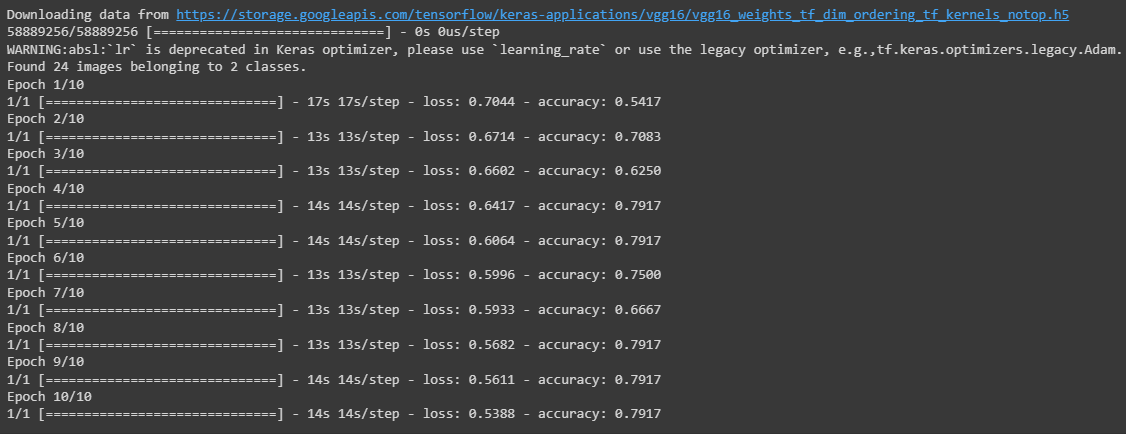

In [ ]:
#Instalacija biblioteka
!pip install deepface
!pip install opencv-python

1/1 [==============================] - 1s 652ms/step
Predicted Gender: Male


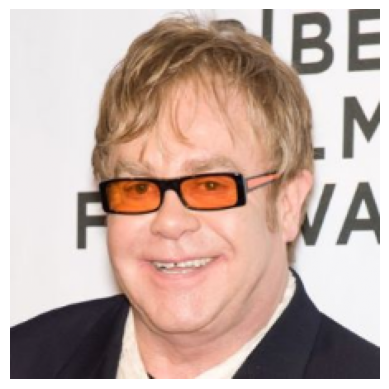

In [16]:
#Testiranje kreiranog modela

import matplotlib.pyplot as plt
from keras.models import load_model
import cv2 #Koristimo CV2 biblioteku da bi mogli da radimo sa slikama
import numpy as np #Numpy biblioteka se poziva radi lakšeg rada sa podacima

# Učitavanje modela
model = load_model('gender_detection_model.h5')

# Probaćemo samo 1 sliku, te je formatiramo sa istim parametrima kao i tokom treninga modela.
test_image_path = '/content/drive/MyDrive/test_elton.jpg'
#test_image_path = '/content/drive/MyDrive/test_madonna.jpg'
img = cv2.imread(test_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))

# Normalizacija pixel vrednosti na 0 do 1 (brži rad modela sa slikama)
img = img / 255.0

# Dodavanje dimenzija koje model očekuje (test slika poseduje 3 dimenzije, a model očekuje 4)
img = np.expand_dims(img, axis=0)

# Predikcija
predictions = model.predict(img)

predicted_class = 1 if predictions[0] > 0.5 else 0

print(f"Predicted Gender: {'Male' if predicted_class == 1 else 'Female'}")

# Da bi sliku prikazali moramo obrisati dodatu dimenziju (matplot graf ne radi sa 4 dimenzije)
img = img[0]

# Prikaz slike
plt.imshow(img)
plt.axis('off')
plt.show()



---


Prethodni model predstavlja ilustraciju kreiranja konvolucijske neuronske mreže s obzirom da je dataset slika mali (*detalji se nalaze u praktičnom delu, "Pregled podataka"*), odlučio sam se za primenu "transfer learning" tehnike za ovaj ilustrativni primer, te smo iz Keras biblioteke preuzeli VGG-Face (koji se koristi kao model sa kojim je moguće vršiti analizu u DeepFace biblioteci, i u praktičnom delu projekta koristiću takođe taj model) ovaj već istrenirani model predstavlja popularno rešenje za analizu atributa lica, i u ovom slučaju, klasifikaciju pola, koristi VGG16 arhitekturu neuronske mreže što znači da poseduje 16 slojeva.


---




DeepFace, razvijen od strane istraživačkog tima Facebook-a, predstavlja moćan alat za analizu lica koristeći duboko učenje. Ova biblioteka je posebno optimizovana za prepoznavanje lica u slikama, uz mogućnost dodatne analize pola, godina i emocija.

Za detekciju lica, DeepFace koristi Frontalization tehnike kako bi (slika) lica bila usmerena prema kameri, 2D reprezentaciju lica pretvara u 3D model, što poboljšava tačnost prepoznavanja.

Kada je reč o prepoznavanju pola, model koristi binarnu klasifikaciju za razlikovanje između muškaraca i žena. Što se tiče analize godina, DeepFace može predviđati starost pomoću regresionih tehnika.

U detekciji emocija, DeepFace koristi emocionalni model koji analizira izraze lica kako bi identifikovao dominantno emocionalno stanje.

U radu će se koristiti DeepFace zbog njegove jednostavne implementacije, visoke tačnosti i sveobuhvatne analize atributa lica.
Kroz primenu ovog modela, cilj je pružiti pouzdano i efikasno rešenje za analizu lica zadatog seta podataka.

U nastavku rada, analiziraću zadati dataset i primeniti biblioteku DeepFace.

# Praktični deo


---



## Pregled podataka


---



In [99]:

file_id = '1T0HWSmfsxV8ZCiXML-qCUV5pe8PkpdZQ'
download_link = f'https://drive.google.com/uc?id={file_id}'

!wget -O Faces_AgeGenderEmotionDetection.zip $download_link


--2024-02-07 00:10:43--  https://drive.google.com/uc?id=1T0HWSmfsxV8ZCiXML-qCUV5pe8PkpdZQ
Resolving drive.google.com (drive.google.com)... 142.251.2.113, 142.251.2.100, 142.251.2.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1T0HWSmfsxV8ZCiXML-qCUV5pe8PkpdZQ [following]
--2024-02-07 00:10:43--  https://drive.usercontent.google.com/download?id=1T0HWSmfsxV8ZCiXML-qCUV5pe8PkpdZQ
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5275912 (5.0M) [application/octet-stream]
Saving to: ‘Faces_AgeGenderEmotionDetection.zip’

Faces_AgeGenderEmot 100%[===================>]   5.03M  16.3MB/s    in 0.3s    

2024-02-07 00:10

In [5]:
import zipfile #Za ekstrakciju datoteke
import os #Za kreiranje foldera unutar colaba

zip_file_path = '/content/drive/MyDrive/Material/Faces_AgeGenderEmotionDetection.zip'

extract_dir = '/content/Material/'

#Ukoliko folder ne postoji, kreirati ga
os.makedirs(extract_dir, exist_ok=True)

# Ekstrakcija dataset-a
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Lista fajlova (foldera unutar dataseta)
extracted_files = os.listdir(extract_dir)
print("Extracted files:", extracted_files)

Extracted files: ['data', 'val', 'train']




---


Nakon ekstrakcije podataka, vidimo da dataset sadrži **data**, **val** i **train** foldere, data folder se sastoji od kombinovanih foldera val i train i sadrže potpuno iste slike.

Train i val (validation) folderi poseduju 5 foldera sa imenima poznatih ličnosti, svaki folder sadrži određen broj slika, sa tim da folderi val i train ne poseduju iste slike za istog glumca, dakle dataset je već podeljen.

Nakon pregleda svih slika, primećuje se da je dataset već pripremljen za obradu, i evaluaciju modela za prepoznavanje lica, te priprema podataka pre korišćenja nije bila potrebna, s obzirom da koristimo već istreniran model, nije bilo potrebno definisati meta podatke za svaku sliku.

Odnosno, da sam trenirao pojedinačno modele za određivanje godina, starosti i emocija, svaka slika bi morala biti obeležena (posedovala labele) sa godinama, polom i emocijom prikazane ličnosti.


---



In [6]:
#Pregled foldera
train_files = os.listdir('/content/Material/train')
print("Files in train:", train_files)
validation_files = os.listdir('/content/Material/val')
print("Files in validation:", validation_files)

Files in train: ['jerry_seinfeld', 'madonna', 'mindy_kaling', 'elton_john', 'ben_afflek']
Files in validation: ['jerry_seinfeld', 'madonna', 'mindy_kaling', 'elton_john', 'ben_afflek']


*Dataset sadrzi 5 poznatih licnosti i odredjen broj njihovih slika*

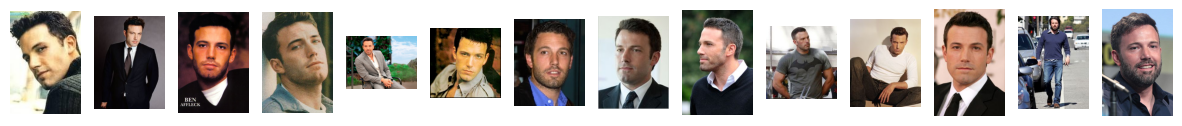

In [7]:
import matplotlib.pyplot as plt #Matplot za prikazivanje slika
import os

# Putanja do foldera sa slikama radi prikaza
folder_path = '/content/Material/train/ben_afflek'

# Svaki fajl unutar foldera (list dir) se proverava, i ukoliko je stvarno fajl (a ne folder), dodaje se na putanju foldera i kao rezultat dobijamo niz imena fajlova za dalji prikaz
#npr. *putanja*/slika1.jpg, *putanja*/slika2.jpg
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Postavljanje veličine grafa
fig, axes = plt.subplots(1, len(image_files), figsize=(15, 5))  # 1 red, broj kolona koliko imamo slika, veličina 15x5 inch-a

# Za svaku sliku...
for i, image_file in enumerate(image_files):
    image_path = os.path.join(folder_path, image_file)

    # Učitaj sliku na osnovu putanje foldera + putanje slike
    image = plt.imread(image_path)

    axes[i].imshow(image)
    axes[i].axis('off')

plt.show()

## Primena modela


---



Action: emotion: 100%|██████████| 3/3 [00:02<00:00,  1.23it/s]


[{'gender': {'Woman': 0.0017825543181970716, 'Man': 99.99821186065674}, 'dominant_gender': 'Man', 'region': {'x': 16, 'y': 44, 'w': 117, 'h': 117}, 'face_confidence': 8.74738914979389, 'age': 25, 'emotion': {'angry': 5.0055790692567825, 'disgust': 0.0009822398169490043, 'fear': 8.845564723014832, 'happy': 0.42011961340904236, 'sad': 6.583019345998764, 'surprise': 0.00665262559778057, 'neutral': 79.13808226585388}, 'dominant_emotion': 'neutral'}]


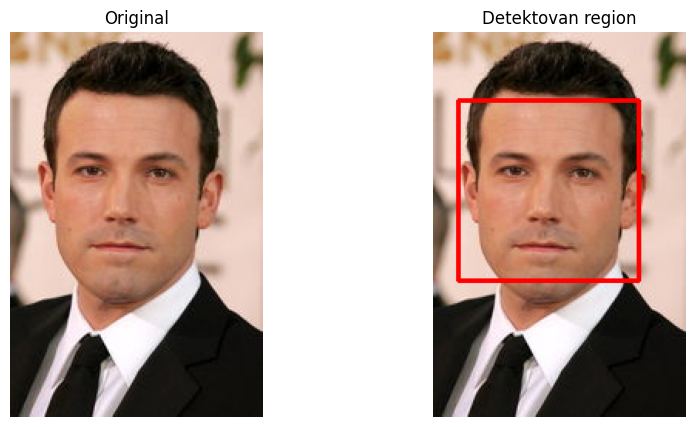

In [17]:
#Testiranje modela na jednoj slici, da bi se ustanovilo u kom formatu vraća podatke i istestiralo da li je dobro instaliran paket
import cv2 #Za rad sa slikama i prosleđivanje modelu
from deepface import DeepFace

# Originalna slika
original_img = cv2.imread('/content/Material/train/ben_afflek/httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg')

# Kopija slike za prikaz regije koju deepface detektuje kao lice
img_with_region = original_img.copy()

results = DeepFace.analyze(img_with_region, actions=["gender", "age", "emotion"]) #Deepface.analyze funkcija može odrediti
              # pol, starost, emociju i rasu osobe na slici, za potrebe zadatka potrebno je samo prva 3 atributa
print(results)
# Na osnovu rezultata funkcije, definišemo region pravougaonika
region = results[0]['region']
x, y, w, h = region['x'], region['y'], region['w'], region['h']

# Nacrtaj pravougaonik
cv2.rectangle(img_with_region, (x, y), (x + w, y + h), (0, 0, 255), 2)  # BGR

# 1 red, 2 kolone
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Prikaz originalne slike
axes[0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)) #CV2 Biblioteka radi sa slikama u BGR spektru, dok je originalna slika u RGB spektru
axes[0].axis('off')
axes[0].set_title('Original')

axes[1].imshow(cv2.cvtColor(img_with_region, cv2.COLOR_BGR2RGB))
axes[1].axis('off')
axes[1].set_title('Detektovan region')

plt.show()



---

Nakon provere, možemo testirati ceo validacioni set podataka i pogledati kakvi su rezultati predikcija.


---



Action: gender: 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]


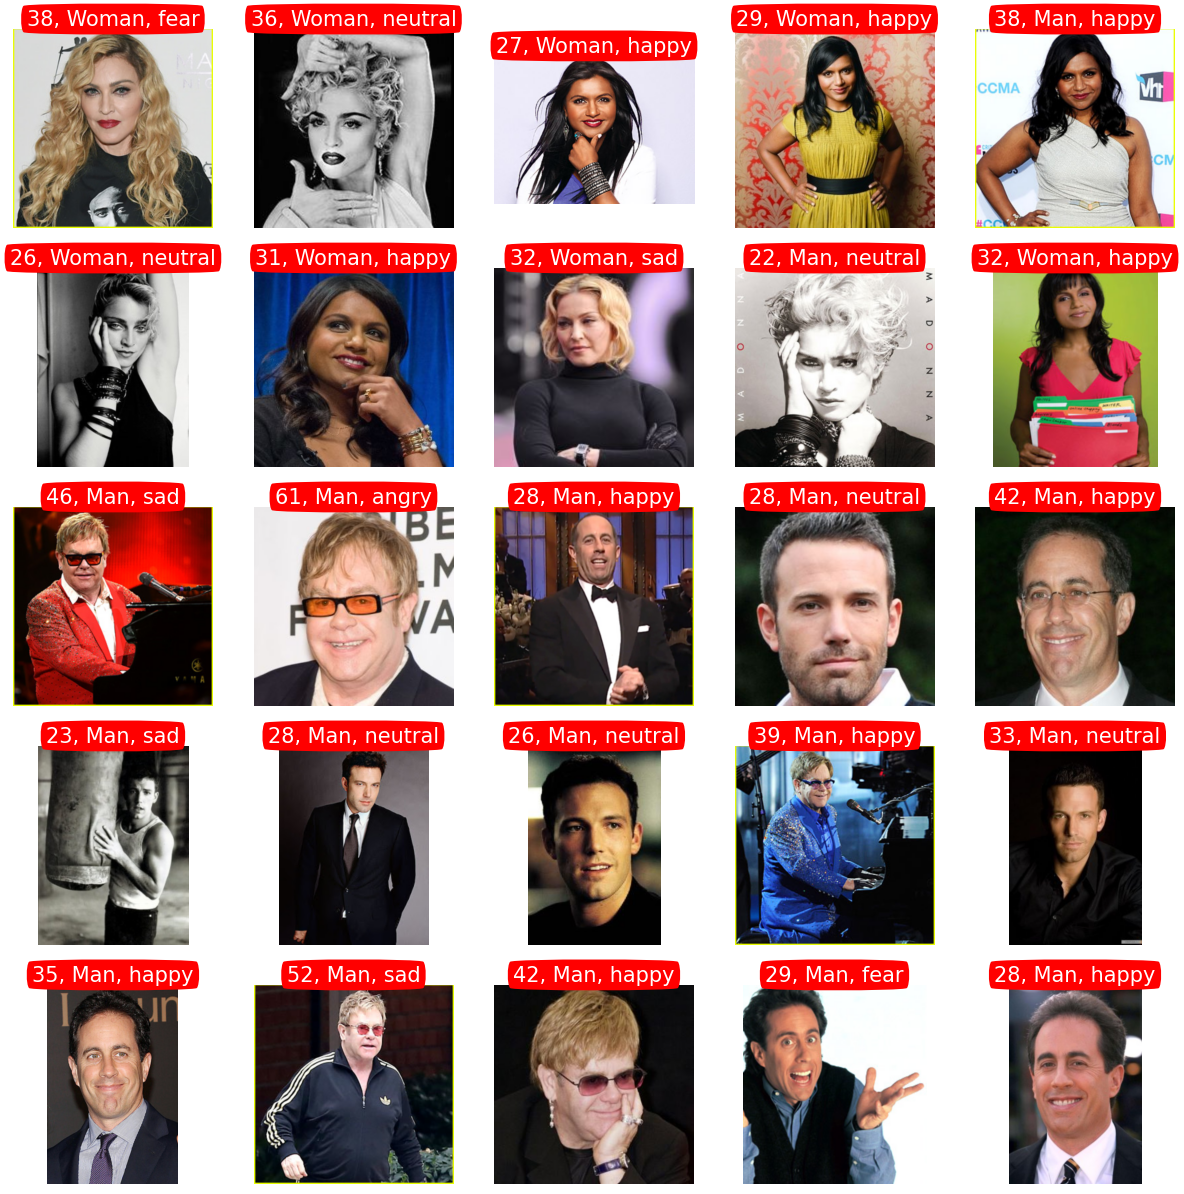

In [9]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
from glob import glob

# Lista svih slika unutar validation foldera
image_files = glob('/content/drive/MyDrive/teorijaVAL/**/*.jpg', recursive=True)

num_columns = 5 #5 redova za 25 slika
num_rows = 5 #5 kolona

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 15)) #15x15 inch-a

j = 0

#Za svaku putanju slike..
for img_file in image_files:
    img = cv2.cvtColor(cv2.imread(img_file), cv2.COLOR_BGR2RGB) #Učitaj sliku u originalnoj boji radi prikaza na grafu

    img_h, img_w, _ = img.shape #Sa obzirom da je sada slika učitana kao numpy niz, prva vrednost je visina, druga je širina, treća je spektar boje (- ignoriše spektar boje, zato što je već podešen)
    r = 640 / max(img_h, img_w) #Standardizacija veličine slike (u ovom koraku se pamti razmera rezolucije,
    # slika se standardizuje tako da pre prosleđivanja modelu slike budu iste veličine)
    img = cv2.resize(img, (int(img_w * r), int(img_h * r)))

    results = DeepFace.analyze(img_file, actions=['age', 'emotion', 'gender'], enforce_detection=False) #Ukoliko deepface ne može detektovati lice, izvršavanje se nastavlja.

    #Prvi rezultat u nizu predstavlja rezultat predikcije za trenutnu sliku u iteraciji, pristupamo vrednostima koje smo dobili
    predicted_gender = results[0]['dominant_gender']
    predicted_age = results[0]['age']
    predicted_emotion = results[0]['dominant_emotion']

    # Kreiranje labele radi prikaza rezultata
    label = "{}, {}, {}".format(int(predicted_age), predicted_gender, predicted_emotion)

    text_x = j // num_columns
    text_y = j % num_columns

    #Tekst + pozadinska boja
    axes[text_x, text_y].text(
        0.5, 1.05, label, fontsize=15, color='white',
        bbox=dict(facecolor='red', alpha=1, edgecolor='none', boxstyle='round4'),
        transform=axes[text_x, text_y].transAxes, ha='center', va='center'
    )
    axes[text_x, text_y].imshow(img)
    axes[text_x, text_y].axis('off')
    j += 1

plt.show()







---


## Diskusija rezultata


---



Validacioni set sadrži 25 slika, po 5 za svaku osobu, na osnovu prikazanog grafa sa slikama vidimo da postoje određene slike koje imaju pogrešne rezultate kod procene godina i emocija, pojedine slike (**1. red, 5. slika**) kao i (**2. red, 4. slika**) takođe imaju problema pri klasifikaciji pola.
Što stavlja akcenat na kvalitet samih slika koje se testiraju, ali takođe i na sam dataset nad kojim je DeepFace treniran.

Sa obzirom da je zadatak bio detekcija starosti, pola i emocija, možemo zaključiti da je starost veoma zavisna od kvaliteta i ugla same slike, odnosno regije koju algoritam detektuje, problem pri određivanju starosti se pojavljuje kod (**3.red, 3. slike**)..

Action: gender: 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]


Dominant Gender: Man
Predicted Age: 28
Dominant Emotion: happy


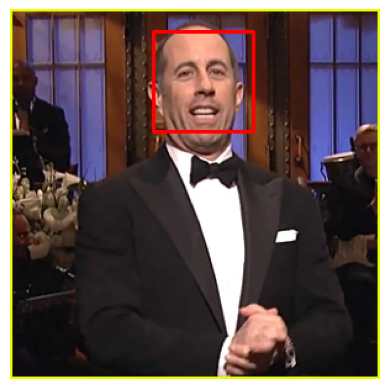

In [10]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/teorijaVAL/male/httpcdncdnjustjaredcomwpcontentuploadsheadlinesjerryseinfeldmakesbrianwilliamsjokejpg.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


results = DeepFace.analyze(image_path, actions=['age', 'emotion', 'gender'], enforce_detection=False)

print(f"\nDominant Gender: {results[0]['dominant_gender']}")
print(f"Predicted Age: {results[0]['age']}")
print(f"Dominant Emotion: {results[0]['dominant_emotion']}")

face_coordinates = results[0]['region']

cv2.rectangle(img, (int(face_coordinates['x']), int(face_coordinates['y'])),
              (int(face_coordinates['x'] + face_coordinates['w']), int(face_coordinates['y'] + face_coordinates['h'])), (255, 0, 0), 2)

plt.imshow(img)
plt.axis('off')
plt.show()


Problem pri određivanju polja se konstantno pojavljuje prilikom obrade (**5. slike u 1. redu**)

Action: gender: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]


Dominant Gender: Man
Predicted Age: 38
Dominant Emotion: happy


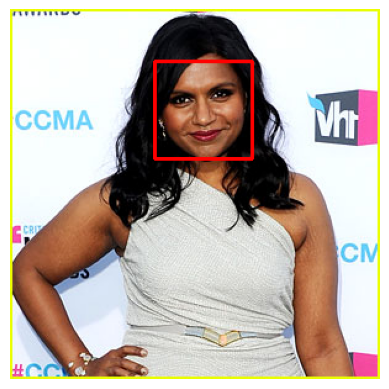

In [18]:

from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/teorijaVAL/female/httpcdncdnjustjaredcomwpcontentuploadsheadlinesmindykalingcomedypilotjpg.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


results = DeepFace.analyze(image_path, actions=['age', 'emotion', 'gender'], enforce_detection=False)

print(f"\nDominant Gender: {results[0]['dominant_gender']}")
print(f"Predicted Age: {results[0]['age']}")
print(f"Dominant Emotion: {results[0]['dominant_emotion']}")

face_coordinates = results[0]['region']

cv2.rectangle(img, (int(face_coordinates['x']), int(face_coordinates['y'])),
              (int(face_coordinates['x'] + face_coordinates['w']), int(face_coordinates['y'] + face_coordinates['h'])), (255, 0, 0), 2)

plt.imshow(img)
plt.axis('off')
plt.show()



---

Koristeći model kreiran u teorijskom delu, možemo pokušati da vidimo da li dobijamo slične rezultate po pitanju pola, odnosno, potvrditi da li su određene slike jednostavno nepogodne za obradu.

---



1/1 [==============================] - 0s 353ms/step


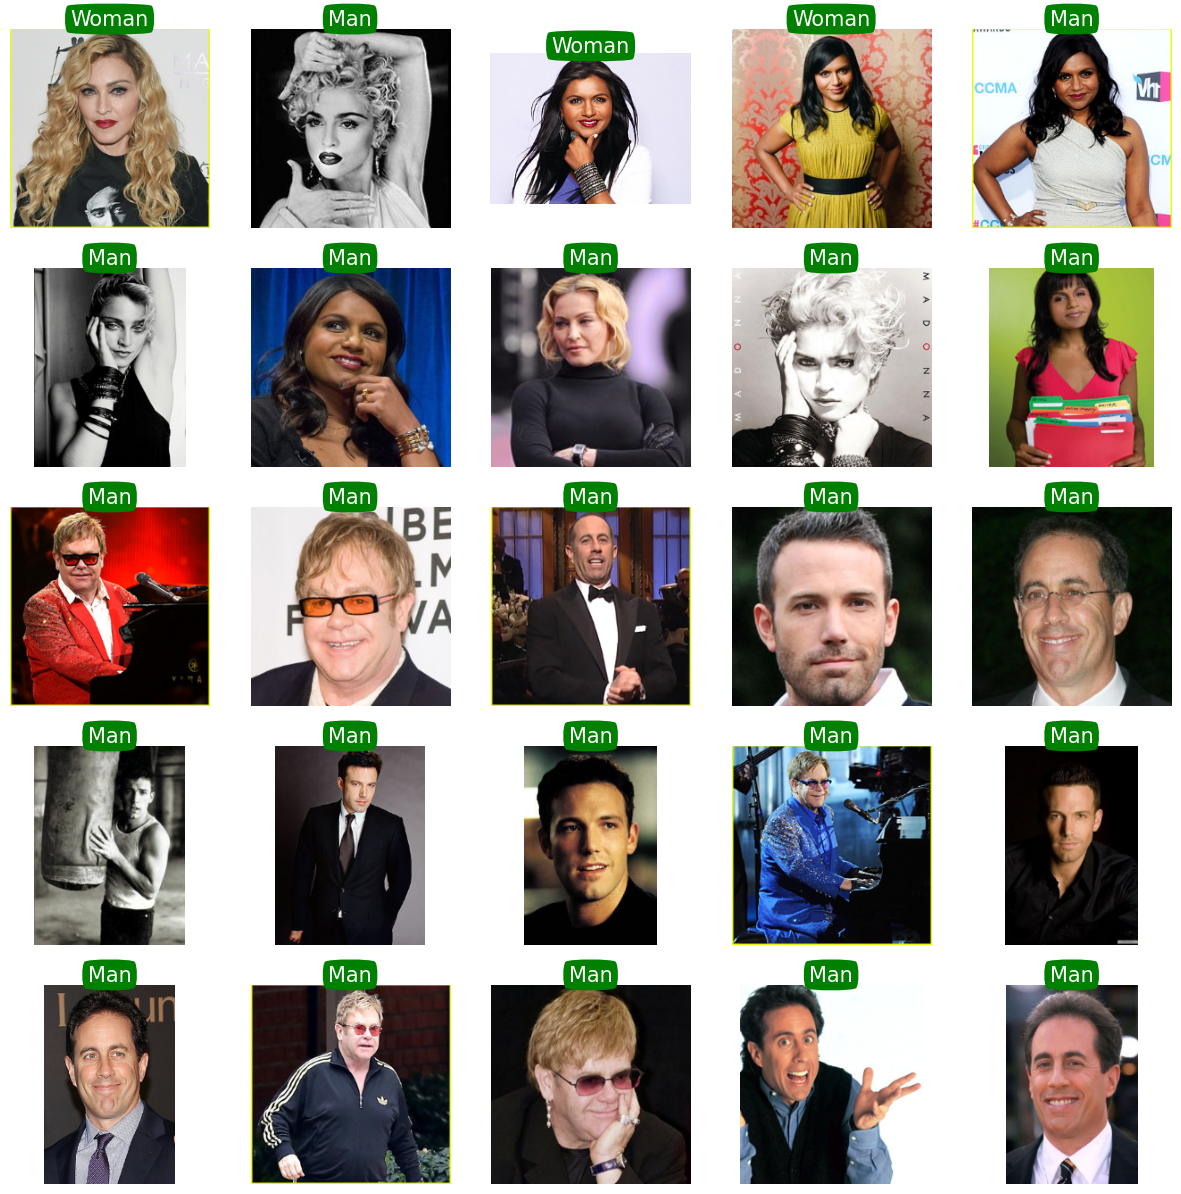

In [19]:
from keras.models import load_model
import cv2
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from deepface import DeepFace


gender_model = load_model('gender_detection_model.h5')

image_files = glob('/content/drive/MyDrive/teorijaVAL/**/*.jpg', recursive=True)

num_images = len(image_files)
num_columns = 5
num_rows = 5

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 15))

j = 0

for img_file in image_files:
    img = cv2.cvtColor(cv2.imread(img_file), cv2.COLOR_BGR2RGB)
    img_h, img_w, _ = img.shape
    r = 224 / max(img_h, img_w)  #(224, 224, 3)
    img = cv2.resize(img, (int(img_w * r), int(img_h * r)))

    # Normalizacija
    img = img / 255.0

    img = np.expand_dims(img, axis=0)

    predictions = gender_model.predict(img)
    predicted_class = 1 if predictions[0] > 0.5 else 0

    gender_label = 'Man' if predicted_class == 1 else 'Woman'

    axes[text_x, text_y].text(
         0.5, 1.05, f'{gender_label}', fontsize=15, color='white',
        bbox=dict(facecolor='green', alpha=1, edgecolor='none', boxstyle='round4'),
        transform=axes[j // num_columns, j % num_columns].transAxes, ha='center', va='center'
    )

    axes[j // num_columns, j % num_columns].imshow(img[0])
    axes[j // num_columns, j % num_columns].axis('off')
    plt.draw()
    j += 1

plt.show()





Pregledom grafika sa slikama, možemo ustanoviti da ovaj model poseduje više grešaka nego DeepFace

$\text{Accuracy} = \frac{\text{Broj tačnih predikcija}}{\text{Ukupan broj predikcija}}$


Ukoliko ponovo testiramo tačnost teorijskog modela kada se pokrene nad svim slikama


In [21]:
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

model = load_model('gender_detection_model.h5')

test_datagen = ImageDataGenerator(rescale=1./255) #Normalizacija slika

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/teorijaVAL',
    target_size=(224, 224),
    batch_size=3,
    class_mode='binary',
    shuffle=False
)

eval_result = model.evaluate(test_generator)

accuracy = eval_result[1]

print(f'Accuracy: {accuracy * 100:.2f}%')



Found 25 images belonging to 2 classes.
9/9 [==============================] - 17s 2s/step - loss: 0.5648 - accuracy: 0.6800
Accuracy: 68.00%


In [22]:
from deepface import DeepFace
import os
from glob import glob


test_dir = '/content/drive/MyDrive/teorijaVAL'

correct_predictions = 0
total_images = 0

for image_file in glob('/content/drive/MyDrive/teorijaVAL/**/*.jpg', recursive=True):
    image_path = os.path.join(test_dir, image_file)

    results = DeepFace.analyze(image_path, actions=['gender'], enforce_detection=False)

    predicted_gender = results[0]['dominant_gender']

    actual_gender = 'Man' if 'male' == os.path.basename(os.path.dirname(image_path)).lower() else 'Woman'

    correct_prediction = predicted_gender.lower() == actual_gender.lower()
    if correct_prediction:
        correct_predictions += 1

    total_images += 1

accuracy = (correct_predictions / total_images) * 100
print(correct_predictions)
print(total_images)
print(f"Accuracy: {accuracy:.2f}%")



23
25
Accuracy: 92.00%
